<a href="https://colab.research.google.com/github/MuhammadNafishGinanjar/spices-classification-using-CNN/blob/main/klasifikasi_rempah_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()   # pilih dataset.zip

zip_name = list(uploaded.keys())[0]
target_path = "/content/dataset"

!mkdir -p $target_path
!unzip -q "$zip_name" -d $target_path

print("Done! Dataset unzipped to:", target_path)


Saving dataset.zip to dataset.zip
Done! Dataset unzipped to: /content/dataset


In [5]:
import os
from PIL import Image

root = "/content/dataset"  # sesuaikan

format_errors = []

for folder, _, files in os.walk(root):
    for file in files:
        path = os.path.join(folder, file)

        try:
            img = Image.open(path)
            fmt = img.format

            if fmt not in ["JPEG", "JPG", "PNG", "BMP", "GIF"]:
                format_errors.append((path, fmt))
        except:
            format_errors.append((path, "Unreadable"))

print("File dengan format tidak didukung TensorFlow:")
for f in format_errors:
    print(f)

print("\nTotal:", len(format_errors))


File dengan format tidak didukung TensorFlow:
('/content/dataset/bawang putih/bawang-putih_143.jpg', 'WEBP')
('/content/dataset/bawang putih/bawang-putih_39.jpg', 'WEBP')
('/content/dataset/bawang putih/bawang-putih_26.jpg', 'WEBP')
('/content/dataset/bawang putih/bawang-putih_176.jpg', 'WEBP')
('/content/dataset/bawang putih/bawang-putih_33.jpg', 'WEBP')
('/content/dataset/bawang putih/bawang-putih_59.jpg', 'WEBP')
('/content/dataset/bawang putih/bawang-putih_105.jpg', 'WEBP')
('/content/dataset/bawang putih/bawang-putih_44.jpg', 'WEBP')
('/content/dataset/bawang putih/bawang-putih_25.jpg', 'WEBP')
('/content/dataset/bawang putih/bawang-putih_107.jpg', 'WEBP')
('/content/dataset/bawang putih/bawang-putih_117.jpg', 'WEBP')
('/content/dataset/bawang putih/bawang-putih_47.jpg', 'WEBP')
('/content/dataset/bawang putih/bawang-putih_175.jpg', 'WEBP')
('/content/dataset/bawang putih/bawang-putih_27.jpg', 'WEBP')
('/content/dataset/bawang putih/bawang-putih_167.jpg', 'WEBP')
('/content/datase

In [6]:
from PIL import Image
import os

root = "/content/dataset"  # ganti sesuai dataset Anda

converted = 0
removed = 0

for folder, _, files in os.walk(root):
    for file in files:
        path = os.path.join(folder, file)

        try:
            img = Image.open(path)
            fmt = img.format

            # Jika format bukan JPG/PNG dll yang didukung, convert
            if fmt not in ["JPEG", "JPG", "PNG", "BMP", "GIF"]:
                # path baru (ubah extension ke .jpg)
                new_path = os.path.splitext(path)[0] + ".jpg"

                # convert ke JPG
                img = img.convert("RGB")
                img.save(new_path, "JPEG", quality=95)

                converted += 1

                # hapus file asli jika beda extension
                if path != new_path:
                    os.remove(path)
                    removed += 1

                print("Converted:", path, "->", new_path)

        except Exception as e:
            print("Gagal memproses:", path, "| Error:", e)

print("\nSelesai!")
print("Total dikonversi:", converted)
print("Total dihapus:", removed)


Converted: /content/dataset/bawang putih/bawang-putih_143.jpg -> /content/dataset/bawang putih/bawang-putih_143.jpg
Converted: /content/dataset/bawang putih/bawang-putih_39.jpg -> /content/dataset/bawang putih/bawang-putih_39.jpg
Converted: /content/dataset/bawang putih/bawang-putih_26.jpg -> /content/dataset/bawang putih/bawang-putih_26.jpg
Converted: /content/dataset/bawang putih/bawang-putih_176.jpg -> /content/dataset/bawang putih/bawang-putih_176.jpg
Converted: /content/dataset/bawang putih/bawang-putih_33.jpg -> /content/dataset/bawang putih/bawang-putih_33.jpg
Converted: /content/dataset/bawang putih/bawang-putih_59.jpg -> /content/dataset/bawang putih/bawang-putih_59.jpg
Converted: /content/dataset/bawang putih/bawang-putih_105.jpg -> /content/dataset/bawang putih/bawang-putih_105.jpg
Converted: /content/dataset/bawang putih/bawang-putih_44.jpg -> /content/dataset/bawang putih/bawang-putih_44.jpg
Converted: /content/dataset/bawang putih/bawang-putih_25.jpg -> /content/dataset/b

Found 1680 files belonging to 8 classes.
Using 1344 files for training.
Found 1680 files belonging to 8 classes.
Using 336 files for validation.
Classes: ['bawang merah', 'bawang putih', 'cengkeh', 'jahe', 'kayu manis', 'kencur', 'kunyit', 'lengkuas']


Model: "spice_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 619,432 (2.36 MB)

 Trainable params: 617,768 (2.36 MB)

 Non-trainable params: 1,664 (6.50 KB)

Epoch 1/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.3127 - loss: 2.0182
Epoch 1: val_accuracy improved from -inf to 0.14583, saving model to best_spice_cnn.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 37s 386ms/step - accuracy: 0.3144 - loss: 2.0131 - val_accuracy: 0.1458 - val_loss: 2.4991 - learning_rate: 0.0010
Epoch 2/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.5546 - loss: 1.3472
Epoch 2: val_accuracy improved from 0.14583 to 0.20238, saving model to best_spice_cnn.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 321ms/step - accuracy: 0.5544 - loss: 1.3480 - val_accuracy: 0.2024 - val_loss: 3.1743 - learning_rate: 0.0010
Epoch 3/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.5731 - loss: 1.2504
Epoch 3: val_accuracy did not improve from 0.20238
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 316ms/step - accuracy: 0.5728 - loss: 1.2515 - val_accuracy: 0.1220 - val_loss: 4.6908 - learning_rate: 0.0010
Epoch 4/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.5894 - loss: 1.2408
Epoch 4: val_accuracy did not improve from 0.20238
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 313ms/step - accuracy: 0.5895 - loss: 1.2403 - val_accuracy: 0.1429 - val_loss: 3.6017 - learning_rate: 0.0010
Epoch 5/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.6160 - loss: 1.2068
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 5: val_accuracy did not improve from 0.20238
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 312ms/step - accuracy: 0.6159 - loss: 1.2062 - val_accu

42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 319ms/step - accuracy: 0.6806 - loss: 0.9664 - val_accuracy: 0.2381 - val_loss: 3.6008 - learning_rate: 5.0000e-04
Epoch 9/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.6755 - loss: 0.9592
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 9: val_accuracy did not improve from 0.23810
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 314ms/step - accuracy: 0.6754 - loss: 0.9599 - val_accuracy: 0.2292 - val_loss: 3.5872 - learning_rate: 5.0000e-04
Epoch 10/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.7103 - loss: 0.9128
Epoch 10: val_accuracy did not improve from 0.23810
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 313ms/step - accuracy: 0.7102 - loss: 0.9132 - val_accuracy: 0.2054 - val_loss: 3.1595 - learning_rate: 2.5000e-04
Epoch 11/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.7422 - loss: 0.8452
Epoch 11: val_accuracy improved from 0.23810 to 0.25595, saving model to best_spice_cnn.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 316ms/step - accuracy: 0.7421 - loss: 0.8459 - val_accuracy: 0.2560 - val_loss: 3.3723 - learning_rate: 2.5000e-04
Epoch 12/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.7214 - loss: 0.8289
Epoch 12: val_accuracy improved from 0.25595 to 0.29464, saving model to best_spice_cnn.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 316ms/step - accuracy: 0.7215 - loss: 0.8292 - val_accuracy: 0.2946 - val_loss: 2.3780 - learning_rate: 2.5000e-04
Epoch 13/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.7185 - loss: 0.8505
Epoch 13: val_accuracy improved from 0.29464 to 0.53274, saving model to best_spice_cnn.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 316ms/step - accuracy: 0.7185 - loss: 0.8506 - val_accuracy: 0.5327 - val_loss: 1.3769 - learning_rate: 2.5000e-04
Epoch 14/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.7468 - loss: 0.8001
Epoch 14: val_accuracy improved from 0.53274 to 0.55952, saving model to best_spice_cnn.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 316ms/step - accuracy: 0.7467 - loss: 0.8008 - val_accuracy: 0.5595 - val_loss: 1.2722 - learning_rate: 2.5000e-04
Epoch 15/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.7457 - loss: 0.8181
Epoch 15: val_accuracy did not improve from 0.55952
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 315ms/step - accuracy: 0.7455 - loss: 0.8179 - val_accuracy: 0.4554 - val_loss: 1.9176 - learning_rate: 2.5000e-04
Epoch 16/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.7557 - loss: 0.7630
Epoch 16: val_accuracy improved from 0.55952 to 0.61905, saving model to best_spice_cnn.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 317ms/step - accuracy: 0.7553 - loss: 0.7643 - val_accuracy: 0.6190 - val_loss: 1.0818 - learning_rate: 2.5000e-04
Epoch 17/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.7478 - loss: 0.7673
Epoch 17: val_accuracy improved from 0.61905 to 0.65774, saving model to best_spice_cnn.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 317ms/step - accuracy: 0.7478 - loss: 0.7675 - val_accuracy: 0.6577 - val_loss: 1.0884 - learning_rate: 2.5000e-04
Epoch 18/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.7483 - loss: 0.8061
Epoch 18: val_accuracy did not improve from 0.65774
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 313ms/step - accuracy: 0.7484 - loss: 0.8052 - val_accuracy: 0.6518 - val_loss: 1.0149 - learning_rate: 2.5000e-04
Epoch 19/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.7527 - loss: 0.7537
Epoch 19: val_accuracy improved from 0.65774 to 0.72024, saving model to best_spice_cnn.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 317ms/step - accuracy: 0.7529 - loss: 0.7537 - val_accuracy: 0.7202 - val_loss: 0.9062 - learning_rate: 2.5000e-04
Epoch 20/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.7668 - loss: 0.7456
Epoch 20: val_accuracy did not improve from 0.72024
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 313ms/step - accuracy: 0.7667 - loss: 0.7459 - val_accuracy: 0.3482 - val_loss: 3.6014 - learning_rate: 2.5000e-04
Epoch 21/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.7793 - loss: 0.7118
Epoch 21: val_accuracy did not improve from 0.72024
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 313ms/step - accuracy: 0.7790 - loss: 0.7124 - val_accuracy: 0.5833 - val_loss: 1.3695 - learning_rate: 2.5000e-04
Epoch 22/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.7987 - loss: 0.6931
Epoch 22: val_accuracy did not improve from 0.72024
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 314ms/step - accuracy: 0.7985 - loss: 0.6938 - val_accuracy: 0.6905 - val_loss: 0.9211 - learning_rate: 2.5000e-04

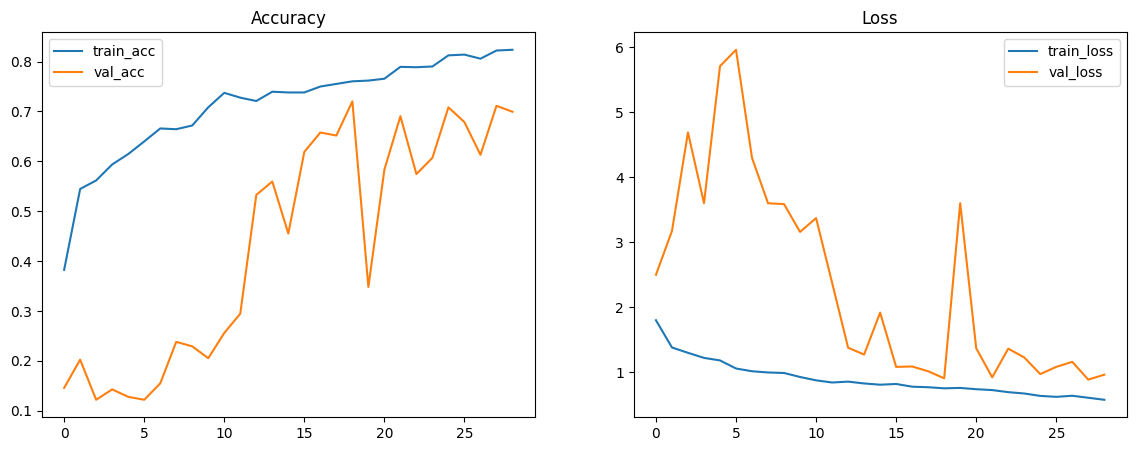

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7138 - loss: 0.9822
Validation accuracy: 0.7202, loss: 0.9062


In [8]:
# Colab-ready CNN training (no pretrained)
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# ========== SETTINGS ==========
DATA_DIR = "/content/dataset"   # ubah jika beda
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42
NUM_CLASSES = 8
EPOCHS = 80
WEIGHT_DECAY = 1e-4            # L2 regularization
DROPOUT_RATE = 0.4
# ==============================

# (1) Prepare datasets (train/val split)
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

class_names = train_ds.class_names
print("Classes:", class_names)

# AUTOTUNE for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# (2) Data augmentation (on-the-fly)
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.12),
    layers.RandomZoom(0.12),
    layers.RandomTranslation(0.06, 0.06),
    layers.RandomContrast(0.08),
], name="data_augmentation")

# (3) Build CNN from scratch (moderate capacity to avoid overfit)
def make_model(input_shape=IMG_SIZE + (3,), num_classes=NUM_CLASSES, weight_decay=WEIGHT_DECAY):
    inputs = keras.Input(shape=input_shape)

    x = layers.Rescaling(1./255)(inputs)
    x = data_augmentation(x)

    # Block 1
    x = layers.Conv2D(32, 3, padding="same", activation=None,
                      kernel_regularizer=l2(weight_decay))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Conv2D(32, 3, padding="same", activation=None,
                      kernel_regularizer=l2(weight_decay))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Dropout(0.15)(x)

    # Block 2
    x = layers.Conv2D(64, 3, padding="same", activation=None,
                      kernel_regularizer=l2(weight_decay))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Conv2D(64, 3, padding="same", activation=None,
                      kernel_regularizer=l2(weight_decay))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Dropout(0.20)(x)

    # Block 3
    x = layers.Conv2D(128, 3, padding="same", activation=None,
                      kernel_regularizer=l2(weight_decay))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Conv2D(128, 3, padding="same", activation=None,
                      kernel_regularizer=l2(weight_decay))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Dropout(0.25)(x)

    # Block 4 (light)
    x = layers.Conv2D(256, 3, padding="same", activation=None,
                      kernel_regularizer=l2(weight_decay))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Dropout(0.30)(x)

    # Classifier
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation=None, kernel_regularizer=l2(weight_decay))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Dropout(DROPOUT_RATE)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs, name="spice_cnn")
    return model

model = make_model()
model.summary()

# (4) Compile
initial_lr = 1e-3
optimizer = keras.optimizers.Adam(learning_rate=initial_lr)
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# (5) Callbacks: EarlyStopping, ReduceLROnPlateau, checkpoint
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-6, verbose=1),
    keras.callbacks.ModelCheckpoint("best_spice_cnn.h5", monitor="val_accuracy", save_best_only=True, verbose=1)
]

# (6) Optional: class weights (balanced) - dataset is balanced so not necessary.
# If you want to use label smoothing -> change loss to tf.keras.losses.SparseCategoricalCrossentropy(label_smoothing=0.05)

# (7) Train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

# (8) Plot training curves
def plot_history(h):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
    ax1.plot(h.history['accuracy'], label='train_acc')
    ax1.plot(h.history['val_accuracy'], label='val_acc')
    ax1.set_title('Accuracy'); ax1.legend()

    ax2.plot(h.history['loss'], label='train_loss')
    ax2.plot(h.history['val_loss'], label='val_loss')
    ax2.set_title('Loss'); ax2.legend()
    plt.show()

plot_history(history)

# (9) Evaluate final model on validation set
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}, loss: {val_loss:.4f}")

# (10) Save the final model to Google Drive if mounted (optional)
# from google.colab import drive
# drive.mount('/content/drive')
# model.save('/content/drive/MyDrive/best_spice_cnn.h5')
